<a href="https://colab.research.google.com/github/mohansingh27/Data-Science--Machine-Learning/blob/main/Randomforesr_%26_Decisiontree_Model_Mohan_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# RandomForest Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('/content/creditcard.csv')

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [4]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,...,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,0.013286,0.006610,-0.004263,0.001496,-0.003508,-0.003079,0.000141,-0.006501,0.001564,0.003176,...,-0.002253,-0.004938,0.004008,-0.001017,-0.000872,0.004513,0.001385,-0.001990,87.658797,0.001720
std,1.941231,1.611224,1.516853,1.419107,1.431731,1.359647,1.301800,1.201138,1.103688,1.095156,...,0.735871,0.730301,0.621623,0.604191,0.521003,0.481857,0.416750,0.325640,258.042879,0.041443
min,-36.510583,-47.429676,-48.325589,-5.560118,-113.743307,-20.054615,-28.215112,-41.484823,-9.481456,-20.949192,...,-21.620120,-8.593642,-32.828995,-2.822684,-8.696627,-1.778061,-8.878665,-15.430084,0.000000,0.000000
25%,-0.908591,-0.600208,-0.893961,-0.847617,-0.694059,-0.770145,-0.551096,-0.211190,-0.642072,-0.535121,...,-0.230210,-0.549030,-0.160179,-0.356599,-0.315738,-0.322766,-0.070204,-0.052351,5.615000,0.000000
50%,0.036251,0.061840,0.170910,-0.022094,-0.051828,-0.278939,0.039155,0.019903,-0.052607,-0.095676,...,-0.032379,-0.000329,-0.009334,0.040045,0.018074,-0.047859,0.001451,0.011354,21.900000,0.000000
75%,1.319727,0.801163,1.016897,0.738688,0.615454,0.392801,0.569769,0.324905,0.599634,0.453059,...,0.184809,0.524484,0.149985,0.437657,0.348895,0.245286,0.090737,0.077483,77.500000,0.000000
max,2.446505,18.902453,3.985446,15.304184,29.016124,73.301626,120.589494,18.282168,10.370658,15.236028,...,22.614889,6.790452,20.803344,4.584549,7.519589,3.517346,31.612198,22.620072,25691.160000,1.000000


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,56962.0,0.013286,1.941231,-36.510583,-0.908591,0.036251,1.319727,2.446505
V2,56962.0,0.006610,1.611224,-47.429676,-0.600208,0.061840,0.801163,18.902453
V3,56962.0,-0.004263,1.516853,-48.325589,-0.893961,0.170910,1.016897,3.985446
V4,56962.0,0.001496,1.419107,-5.560118,-0.847617,-0.022094,0.738688,15.304184
V5,56962.0,-0.003508,1.431731,-113.743307,-0.694059,-0.051828,0.615454,29.016124
V6,56962.0,-0.003079,1.359647,-20.054615,-0.770145,-0.278939,0.392801,73.301626
V7,56962.0,0.000141,1.301800,-28.215112,-0.551096,0.039155,0.569769,120.589494
V8,56962.0,-0.006501,1.201138,-41.484823,-0.211190,0.019903,0.324905,18.282168
V9,56962.0,0.001564,1.103688,-9.481456,-0.642072,-0.052607,0.599634,10.370658
V10,56962.0,0.003176,1.095156,-20.949192,-0.535121,-0.095676,0.453059,15.236028


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      56962 non-null  float64
 1   V2      56962 non-null  float64
 2   V3      56962 non-null  float64
 3   V4      56962 non-null  float64
 4   V5      56962 non-null  float64
 5   V6      56962 non-null  float64
 6   V7      56962 non-null  float64
 7   V8      56962 non-null  float64
 8   V9      56962 non-null  float64
 9   V10     56962 non-null  float64
 10  V11     56962 non-null  float64
 11  V12     56962 non-null  float64
 12  V13     56962 non-null  float64
 13  V14     56962 non-null  float64
 14  V15     56962 non-null  float64
 15  V16     56962 non-null  float64
 16  V17     56962 non-null  float64
 17  V18     56962 non-null  float64
 18  V19     56962 non-null  float64
 19  V20     56962 non-null  float64
 20  V21     56962 non-null  float64
 21  V22     56962 non-null  float64
 22

In [7]:
data.dtypes

,0
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64
V10,float64


In [8]:
data.shape

(56962, 30)

In [9]:
data.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [10]:
data.isnull().sum().sum()

0

In [11]:
data.duplicated().sum()

675

In [13]:
data.Target.value_counts()

,count
Target,
0,56864
1,98


<ipython-input-19-8df3b5c71459>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=data,palette='husl')


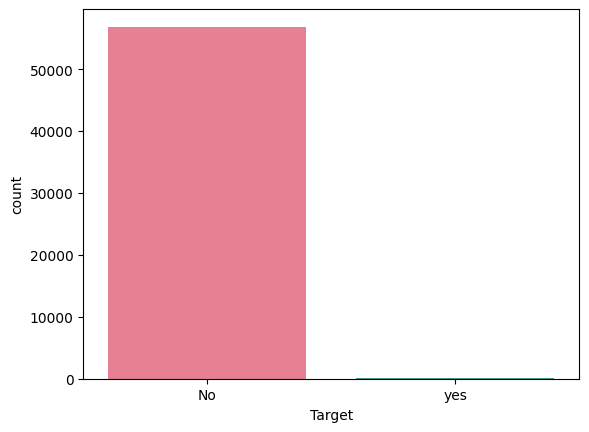

In [19]:
sns.countplot(x='Target', data=data,palette='husl')
plt.xticks([0,1],['No','yes'])
plt.show()

In [20]:
X= data.drop('Target',axis=1)
y= data['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score, confusion_matrix, classification_report,precision_score,recall_score

In [45]:
rt= RandomForestClassifier(n_estimators=100,max_depth=5,criterion= "entropy")
rt.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [46]:
y_pred= rt.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred)

0.9991222680593347

In [48]:
roc_auc_score (y_test, y_pred)

0.7999120724522993

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)

array([[11370,     3],
       [    9,    11]])

In [32]:
cm=confusion_matrix(y_test, y_pred)

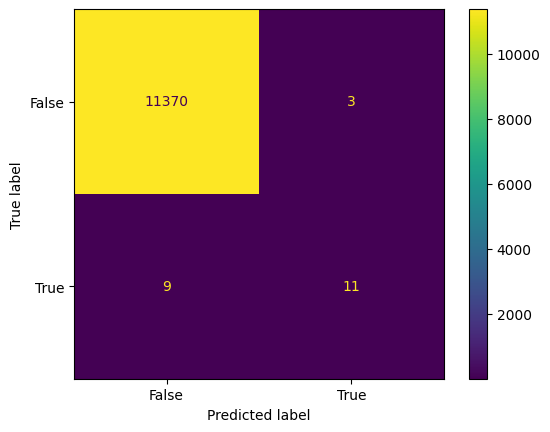

In [34]:
ConfusionMatrixDisplay(cm).plot()
plt.xticks([0,1],['False','True'])
plt.yticks([0,1],['False','True'])
plt.show()

In [38]:
precision_score(y_test, y_pred)

0.7857142857142857

In [41]:
recall_score(y_test, y_pred)

0.55

In [43]:
features = X_train.columns

importances = rt.feature_importances_

indices = np.argsort(importances)

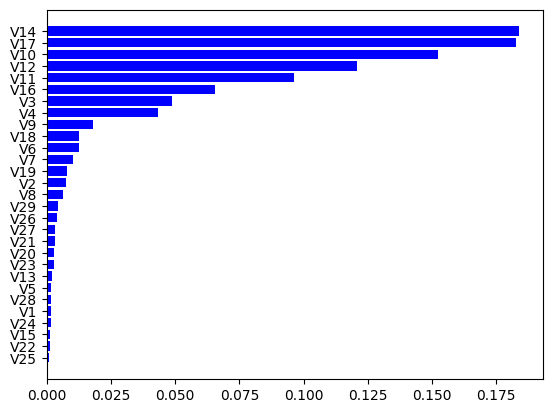

In [44]:
plt.barh(range(len(indices)), importances[indices], color = 'blue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()

In [49]:
# decision Tree Model evaluation

from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(max_depth=5,criterion= "entropy")
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [50]:
y_pred_dt= dt.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred_dt)

0.9989467216712016

In [52]:
precision_score(y_test, y_pred_dt)

0.7222222222222222

In [55]:
roc_auc_score (y_test, y_pred_dt)

0.8247801811307482